In [4]:
!pip install langchain langgraph langchain-google-genai

In [97]:
from langgraph.graph.message import Annotated
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal,List, Annotated
from pydantic import  Field,BaseModel
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from langchain_core.prompts import PromptTemplate
import operator

In [98]:
class jdSchema(TypedDict):
  title:str
  Location:str
  About:str
  responsibility:str
  skill:str

In [99]:
class recruetment(TypedDict):
    role:str
    jd:Annotated[List[jdSchema],operator.add]
    approved:str

In [100]:
load_dotenv()

True

In [101]:
answer=recruetment({'role':'hello'})
answer['role']

'hello'

In [52]:
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [112]:
graph=StateGraph(recruetment)

In [113]:
def create_jd(state:recruetment):
  print('in the create jd ',state)
  prompts=PromptTemplate(template='you are perfect job description writer with over 5 year of experience, now your goal is to write a jd fro our company on this role {role}',input_variables=['role'])
  newmodel=model.with_structured_output(jdSchema)
  chain=prompts | newmodel
  result=chain.invoke({'role':state['role']})
  return {'jd':[result]}

In [114]:
def checkJD(state:recruetment):
  print(state['jd'])
  check=int(input('Press 1 for Approving the JD else press 0 :'))
  if check==1:
    return {'approved':'approved'}
  else:
    return {'approved':'not_approved'}


In [115]:
def make_decison(state:recruetment) -> ['not_approved','isApproved']:
  if state['approved']=='approved':
    return 'isApproved'
  else:
    return 'not_approved'


In [116]:
def not_approved(state:recruetment):
  print('jd is not approved ')
  return state

In [117]:
def isApproved(state:recruetment):
  print('jd is approved ')
  return state

In [118]:
graph.add_node('create_jd',create_jd)
graph.add_node('check_jd',checkJD)
graph.add_node('approved',isApproved)
graph.add_node('no_approved',not_approved)

In [119]:
graph.add_edge(START,'create_jd')
graph.add_edge('create_jd','check_jd')
graph.add_conditional_edges('check_jd',make_decison,{'isApproved':'approved','not_approved':'no_approved'})
graph.add_edge('approved',END)
graph.add_edge('no_approved','create_jd')

In [120]:
workflow=graph.compile()

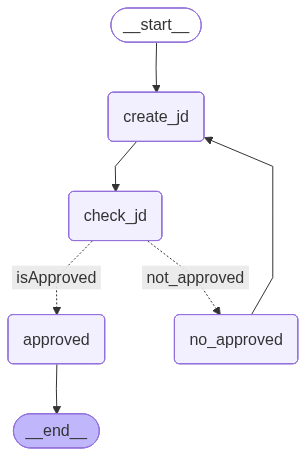

In [121]:
workflow

In [122]:
workflow.invoke({'role':'software engineer'})

in the create jd  {'role': 'software engineer', 'jd': []}
[{'skill': 'Proficiency in Java, Python. Experience with AWS, Agile methodologies. Strong problem-solving skills.', 'title': 'Software Engineer', 'responsibility': 'Design, develop, and test software. Troubleshoot and debug issues. Collaborate with teams.', 'About': 'Develops and maintains software applications.', 'Location': 'Bangalore'}]
Press 1 for Approving the JD else press 0 :0
jd is not approved 
in the create jd  {'role': 'software engineer', 'jd': [{'skill': 'Proficiency in Java, Python. Experience with AWS, Agile methodologies. Strong problem-solving skills.', 'title': 'Software Engineer', 'responsibility': 'Design, develop, and test software. Troubleshoot and debug issues. Collaborate with teams.', 'About': 'Develops and maintains software applications.', 'Location': 'Bangalore'}, {'skill': 'Proficiency in Java, Python. Experience with AWS, Agile methodologies. Strong problem-solving skills.', 'title': 'Software Engin

{'role': 'software engineer',
 'jd': [{'skill': 'Proficiency in Java, Python. Experience with AWS, Agile methodologies. Strong problem-solving skills.',
   'title': 'Software Engineer',
   'responsibility': 'Design, develop, and test software. Troubleshoot and debug issues. Collaborate with teams.',
   'About': 'Develops and maintains software applications.',
   'Location': 'Bangalore'},
  {'skill': 'Proficiency in Java, Python. Experience with AWS, Agile methodologies. Strong problem-solving skills.',
   'title': 'Software Engineer',
   'responsibility': 'Design, develop, and test software. Troubleshoot and debug issues. Collaborate with teams.',
   'About': 'Develops and maintains software applications.',
   'Location': 'Bangalore'},
  {'skill': 'Strong proficiency in Java, Python, or C++. Experience with front-end frameworks (e.g., React, Angular) and back-end technologies (e.g., Node.js, Spring). Familiarity with database systems (SQL, NoSQL). Knowledge of cloud platforms (AWS, Azu

In [91]:
# workflow.invoke({'state': {'role': 'software engineer'}})